In [1]:
## general imports
import json
import numpy as np

## COCO imports
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools.cocoanalyze import COCOanalyze

## analysis API
from analysis import analysis_api

## plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io as io

In [6]:
## set paths
dataDir  = '.'
dataType = 'testdev2015' #'val2014', 'testdev2015'
annType  = 'keypoints' 
teamName = 'maskrnn9' #'fakekeypoints100', 'cmu', 'grmi', 'maskrnn9', 'maskrnn10'

annFile  = '%s/annotations/%s_%s.json'%(dataDir, annType, dataType)
resFile  = '%s/results/%s_%s_%s_results.json'%(dataDir, teamName, annType, dataType)

print("{:10}[{}]".format('annFile:',annFile))
print("{:10}[{}]".format('resFile:',annFile))

## create dictionary with all images info
gt_data   = json.load(open(annFile,'rb'))
imgs_info = {i['id']:{'id':i['id'] , 
                      'width':i['width'], 
                      'height':i['height']} 
                       for i in gt_data['images']}

## load team detections
team_dts = json.load(open(resFile,'rb'))
team_dts = [d for d in team_dts if d['image_id'] in imgs_info]
team_img_ids = set([d['image_id'] for d in team_dts])
print("Loaded [{}] instances in [{}] images.".format(len(team_dts),len(imgs_info)))

annFile:  [./annotations/keypoints_testdev2015.json]
resFile:  [./annotations/keypoints_testdev2015.json]
Loaded [242657] instances in [20288] images.


In [7]:
## initialize COCO ground-truth api
coco_gt = COCO( annFile )
if teamName == 'fakekeypoints100':
    imgIds  = sorted(coco_gt.getImgIds())
    imgIds  = imgIds[0:100]
    imgId   = imgIds[np.random.randint(100)]
    
## initialize COCO detections api
coco_dt   = coco_gt.loadRes( team_dts )

## initialize COCO analyze api
coco_analyze = COCOanalyze(coco_gt, coco_dt, annType)
if teamName == 'fakekeypoints100':
    coco_analyze.cocoEval.params.imgIds = imgIds

loading annotations into memory...
Done (t=1.49s)
creating index...
index created!
Loading and preparing results...
DONE (t=3.57s)
creating index...
index created!


<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=21.75s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.29s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.878
 Average Precision  (AP) @[ IoU=0.55      | area=   all | maxDets= 20 ] = 0.858
 Average Precision  (AP) @[ IoU=0.60      | area=   all | maxDets= 20 ] = 0.834
 Average Precision  (AP) @[ IoU=0.65      | area=   all | maxDets= 20 ] = 0.798
 Average Precision  (AP) @[ IoU=0.70      | area=   all | maxDets= 20 ] = 0.752
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.690
 Average Precision  (AP) @[ IoU=0.80      | area=   all | maxDets= 20 ] = 0.608
 Average Precision  (AP) @[ IoU=0.85      | area=   all | maxDets= 20 ] = 0.489
 Average Precision  (AP) @[ IoU=0.90      | area=   all | maxDets= 20 ] = 0.331
 Average Precision  (AP) @[ IoU=0.95      | area=   all | maxDets= 20 ] 

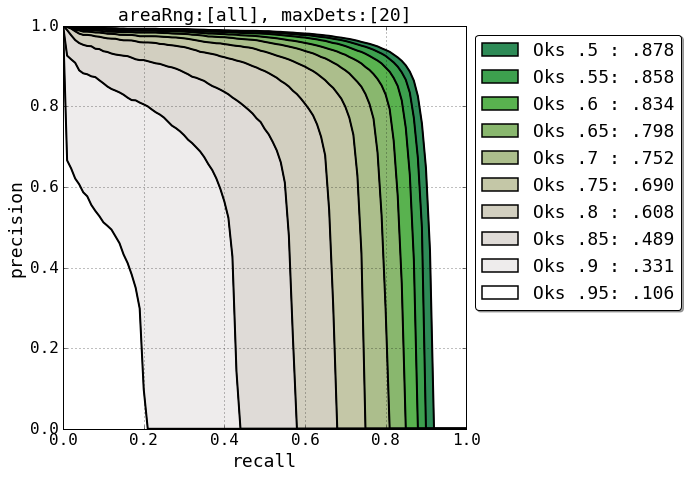

In [8]:
# use evaluate() method for standard coco evaluation
# input arguments:
#  - verbose   : verbose outputs    (default: False)
#  - makeplots : plots eval results (default: False)
#  - savedir   : path to savedir    (default: None)
#  - team_name : team name string   (default: None)

coco_analyze.evaluate(verbose=True, makeplots=True)

<mrr:2.0>Analyzing keypoint errors...
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=20.00s).
Finding all errors causing false positives...
Done (t=11.75s).
<mrr:2.0>DONE (t=32.01s).
Number detections: [242657]
Number matches:    [23855]
Total Num. keypoints: [267879]
 - Good,      [tot]-[perc]:    [197535]-[73.7403827848]
 - Jitter,    [tot]-[perc]:    [33773]-[12.6075578899]
 - Inversion, [tot]-[perc]:    [9954]-[3.71585678609]
 - Swap,      [tot]-[perc]:    [4948]-[1.84710260976]
 - Miss,      [tot]-[perc]:    [21669]-[8.08909992945]


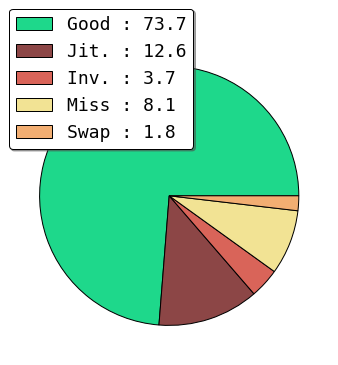


Per keypoint breakdown:
 - Jitter:     [ 2825.  2131.  2063.  1504.  1585.  2299.  2191.  2075.  2074.  1976.
  1936.  3274.  3199.  1284.  1379.   995.   983.]
 - Inversion:  [    0.   148.   144.    30.    34.   688.   667.   361.   392.   656.
   627.  1052.  1028.  1034.   990.  1052.  1051.]
 - Swap:       [ 160.  130.  150.  107.   85.  473.  469.  395.  460.  448.  435.  333.
  336.  268.  263.  214.  222.]
 - Miss:       [  885.   606.   605.   509.   576.   984.   950.  1595.  1599.  1950.
  1942.  1632.  1681.  1587.  1624.  1435.  1509.]


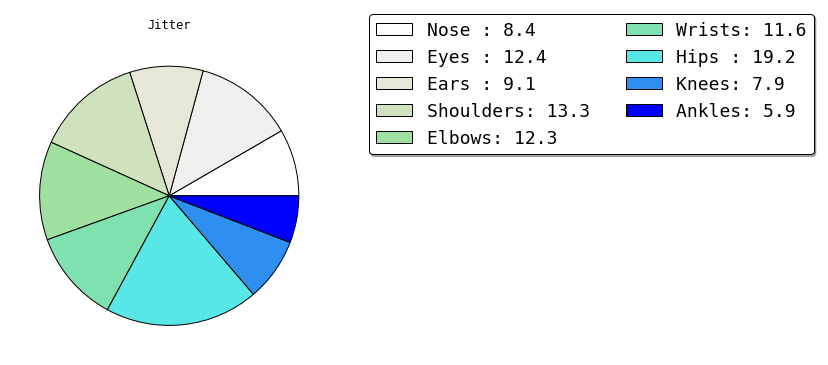

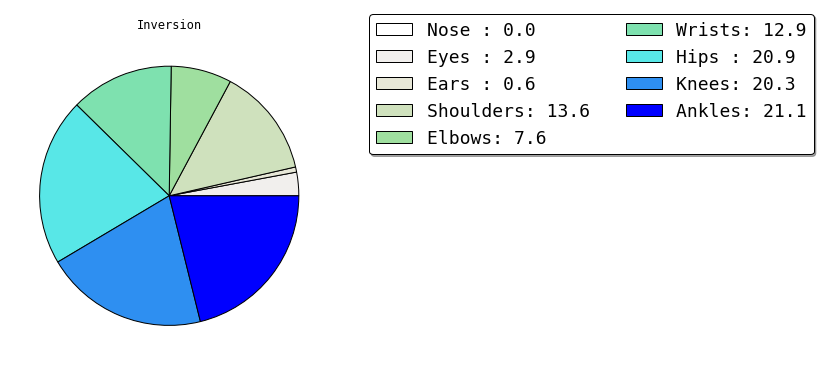

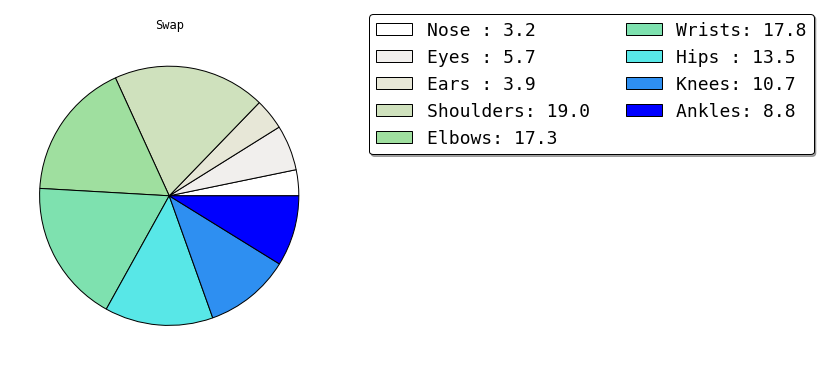

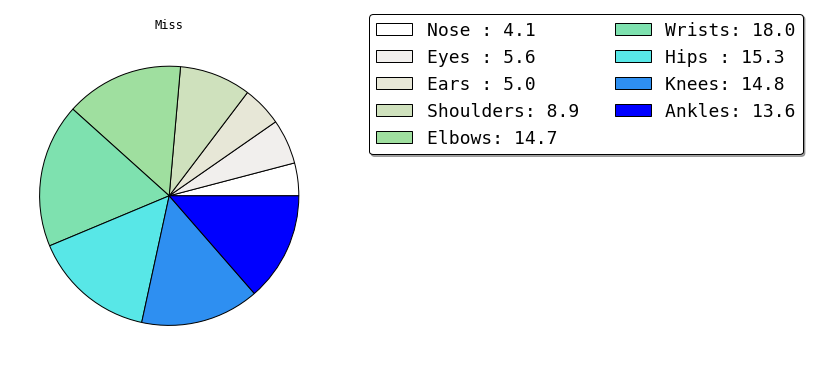

In [9]:
## analyze localization errors' breakdown over keypoints
analysis_api.localizationKeypointBreakdown( coco_analyze )

In [ ]:
## analyze impact of localization errors on AUC
analysis_api.localizationAUCImpact( coco_analyze )

In [ ]:
## analyze impact of localization errors on OKS
analysis_api.localizationOKSImpact( coco_analyze, .75 )

In [ ]:
## analyze impact of scoring errors on AUC
analysis_api.scoringAUCImpact( coco_analyze )

In [ ]:
## analyze impact of scoring errors on ground-truth and detection matches OKS
#analysis_api.scoringOKSImpact( coco_analyze )

In [ ]:
## analyze impact of background FP and FN errors
analysis_api.backgroundAUCImpact( coco_analyze )

<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=20.22s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.12s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.878
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.916
<mrr:2.0>Correcting error type [bkg. fp, fn]:
<mrr:2.0>Running per image evaluation...
<mrr:2.0>Evaluate annotation type *keypoints*
<mrr:2.0>DONE (t=19.16s).
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.12s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.911
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.916
<mrr:2.0>Accumulating evaluation results...
<mrr:2.0>DONE (t=0.11s).
<mrr:2.0>Verbose Summary:
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 1.000
 Average Recall     (AR) @[ IoU=0.50      |

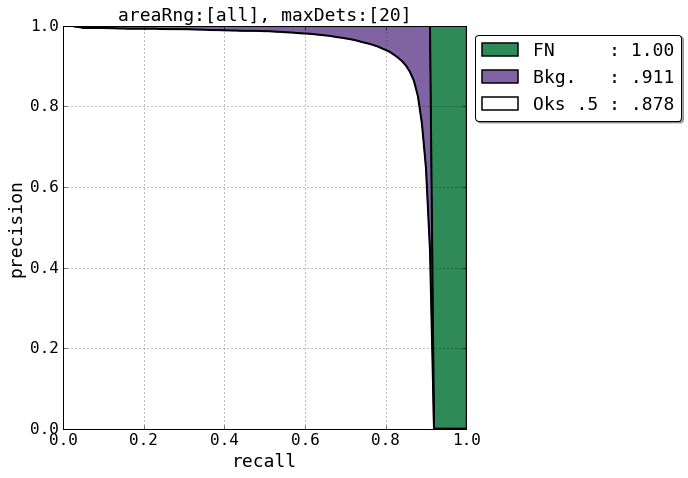

All detections: [242657]
 - Matches:     [45859]
 - Bckgd. FP:   [196798]

All ground-truth: [43862]
 - Matches:       [34584]
 - Bckgd. FN:     [9278]
    - >0 kpts:    [2050]
False Negative Characteristics:
Avg. num. keypoints:                  [7.07]
Avg. num. people in images:           [7.78]
Avg. num. of annotations with IoU>.1: [0.68]
Distribution of annotations with IoU>.1 (normalized by values over all dataset):


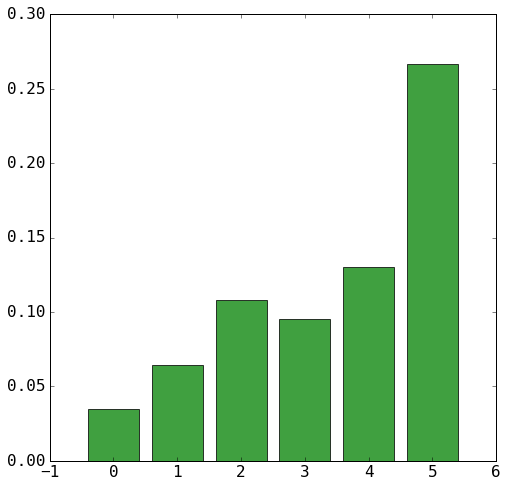

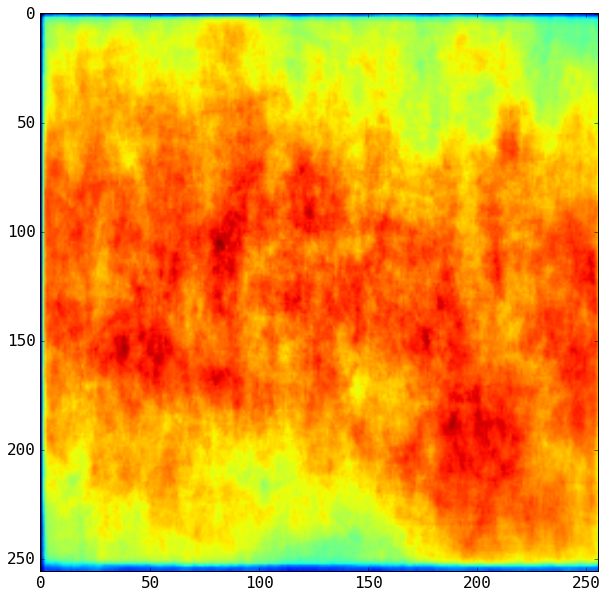

In [10]:
## analyze characteristics of FN errors
analysis_api.backgroundCharacteristics( coco_analyze, .5, imgs_info )

In [ ]:
## analyze impact of number of visible keypoints (occlusion) and number of overlapping annotations (crowding)
# on the performance in terms of AUC and on the frequency of individual localization errors
analysis_api.occlusionAndCrowdingSensitivity( coco_analyze, .75 )

In [ ]:
## analyze impact of number of instance size
analysis_api.sizeSensitivity( coco_analyze, .75 )